# kNN k-Nearrest Neighbor
## 原理

<img stype="float:center;" src="https://mmbiz.qpic.cn/mmbiz_jpg/hflWRBRSEZ5fabRfy43UoH00PO78iaKq9yPKlHCFCypxAnD8lBRaoQryMYu75esImve4QGt8Z8U6ub9MImpSiaibQ/640?wx_fmt=jpeg&wxfrom=5&wx_lazy=1&wx_co=1" width="40%" >


给定测试样本，根据某种距离度量找出训练集中与之最邻近的k个训练样本，然后通过‘投票法’，即选择k个样本中种类最多的标记作为预测结果。一般k取不大于20的整数。

$$ y = \underset{c_j}{\arg\max} \sum_{x_i \in N_k(x)} \mathbb{I}(y_i=c_j), \quad   i=1,2,...,N; \quad j=1,2,...,k$$

* lazy learning ：在训练阶段仅仅把样本保存起来，不作处理，到测试的时候再进行处理。  
* 密采样假设 dense sample：任意测试样本$x$附近任意小的$\delta$距离范围内总能找到一个训练样本。
* metric learning 度量学习：寻找合适的度量，对高维数据进行降维， ‘学习’出度量表达形式

$$ dist_{weight}^2( \mathbf{x}_i,\mathbf{x}_j) = {\left\| x_i - x_j\right\|}_2^2 = w_1\cdot dist_{ij,1}^2 + w_2\cdot dist_{ij,2}^2 + \cdot \cdot \cdot + w_d\cdot dist_{ij,d}^2$$
#### Pros
high accuracy，insensitive to outliers（类别是由邻居中的大多数决定的，一个异常邻居并不能影响太大），无需假定预先分布；算法简单，不需要训练数据。
#### Cons
computationally expensive and requires a lot of memory

### os system
```
import os 
os.getcwd                                    # find the current path
folder = os.path.abspath(os.getcwd())
filepath = os.path.join(folder, 'data', fname)
```


### prepare input dataset
```
- numpy.empty((shape, dtype=float) np.empty([2, 2]), didnt set value when initiating, faster than zeros([,])
- with open(filename, 'r') as files:
- n_rows = len(raw_data)  
  n_colomn = len(raw_data[0].split(delimiter)) 
  
- for counter, value in enumerate(list):
    for i, row in enumerate(raw_data):     #It allows us to loop over something and have an automatic counter
            X[i, :] = row.split(delimiter)[:-1]
            y.append(row.split(delimiter)[-1].strip())

    y = np.array(y)  

```

### Data normalizing  

$$ value_{norm} = \frac {value_{raw} - min}{max - min} $$


### List and tuple 

- list: []  using len(), .append(),  example: L = ['Apple', 123, True]
- tuple: () t = ('a','b',['A','B']) ，t.shape[0] $\quad $ elements(pointer) in a tuple can not be modified. but the element it-self can be            changed.  


```
t[0] = 'c' is incorrect, because no modification
t[2][0] = 'X' is right, because t[2] points to a list where the element can be modified. but t[2] is incorrect

```

- permute a list 
```
np.random.permutation([1, 4, 9, 12, 15])  Randomly permute the array
```
- indice in python 
```
import numpy as np
arr = np.array([10, 20, 30, 40, 50])
print(arr[:3])
```
output is 10,20,30. In python, take first N elements, write indice N, but arr[N] isn't included. 如同 range（n）.最后一个元素是不包含的。 但是[n:] 包含arr[n]和后面所有的

There are two examples in this part:
 1. Helping Hellen :Dating site match algorithm
 2. digit recognition


Classify the given point

```
- argsort() return the index of sorted array
- sorted(classCount.items, key = operator.itemgetter(1), reverse = True ) sort dictionary 
- tile : rep_inX = np.tile(inX, (datasetSize,1))  tile(value, ( n row , m coln))
```

In [1]:
from lib.kNN import kNN_Classify0
from lib.utility import *
import os

In [2]:
gr,lb = CreateDataset()
print('the prediction of your choice is : ', kNN_Classify0([0,0],gr,lb,3))

the prediction of your choice is :  b


## Example 1 Hellen Dating site

Help Hellen to improve a dating experience  

Dataset: datingTestSet.txt from dating with 1000 entries

```
40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike

```
- line 1 : flyer miles earned per year
- line 2 : percentage of time spent in playing VG
- line 3 : liters of ice cream consumed per week
- line 4 : three types of people she went out with 
       

In [3]:
datingMat,datingLab = file2mat(os.path.join('data','datingTestSet.txt'))

In [4]:
datingMat.shape, np.array(datingLab).shape

((1000, 3), (1000,))

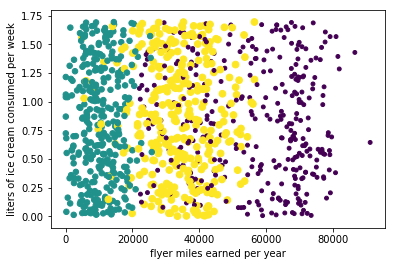

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.scatter(datingMat[:,0],datingMat[:,2],15*np.array(datingLab),15*np.array(datingLab))
plt.xlabel('flyer miles earned per year')
plt.ylabel('liters of ice cream consumed per week')
plt.show()

#### The three population show a difference when classifying by the feature ' flyer miles ' and  'ice cream consuption' does not have strong correlation with the result. it can be dropped. 

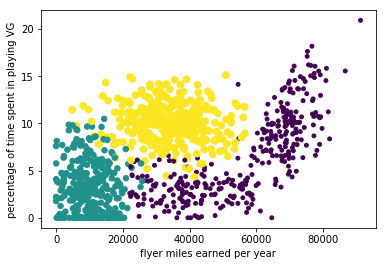

In [6]:
fig = plt.figure(2)
ax2 = fig.add_subplot(111)
ax2.scatter(datingMat[:,0],datingMat[:,1],15*np.array(datingLab),15*np.array(datingLab))
plt.xlabel('flyer miles earned per year')
plt.ylabel('percentage of time spent in playing VG')
plt.show()

### normalizing dataMat

In [7]:
dating_Mat_Norm,d_min,d_interval = data_Norm(datingMat)
print(dating_Mat_Norm)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### error counting 

In [8]:
ErrorTest(0.2,os.path.join('data','datingTestSet.txt'),10, method = 'kNN')

0.035

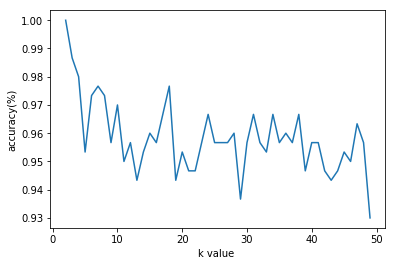

In [9]:
Accuracy_kNN = []
k = np.arange(2,50,1)
for i in k:
    Accuracy_kNN.append(1.0 - ErrorTest(0.3,os.path.join('data','datingTestSet.txt'),i))
plt.plot(k,Accuracy_kNN)
plt.xlabel("k value ")
plt.ylabel("accuracy(%)")
plt.show()

## Writting kNN classifier in class type in Python

In [10]:
from lib.kNN_class import kNN

hellen_k = kNN(neighbor = 3)
hellen_k.fit(dating_Mat_Norm,datingLab)

In [19]:
hellen_k.predict(dating_Mat_Norm[0])

3